	Importing the libraries 
	Data collection and analysis
	Data standardization

	Train test split
	Training the model
	Model Evaluation
	 Making a predictive system

In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#DATA COLLECTION AND ANALYSIS & load the dataset to the pandas dataset
diabetes_dataset = pd.read_csv("C:\\Users\\veluk\\OneDrive\\Desktop\\intern\\diabetes.csv")

In [3]:
# print the first 5 rows of the dataset
diabetes_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#getting column from the outcome column(i.e label)
diabetes_dataset['Outcome'].value_counts()
#0--->Non-Diabetes
#1--->Diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
#getting mean value for the Outcomes
mean_values = diabetes_dataset.groupby('Outcome').mean()
print(mean_values)


         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [8]:
#separating the data and labels
x=diabetes_dataset.drop(columns='Outcome',axis=1) #axis=1(dropping column),axis=0(dropping row)
y=diabetes_dataset['Outcome']

In [9]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
#DATA STANDARDIZATION

#create a variable scalar and load the StandardScalar function 
scalar = StandardScaler()

In [12]:
#fitting the inconsistent data with our standard scalar function
scalar.fit(x)

StandardScaler()

In [13]:
#transform all the standardized data in an common range
#--> helps for better prediction bcz all the values are almost in a commmon range
standardized_data=scalar.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
#assign the standardized_data again with x 
x=standardized_data
y=diabetes_dataset['Outcome']

In [15]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
#TRAIN TEST SPLIT
#x-data
#y-label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)
#x_train - to train the x data
#x_test - the trained data is tested
#y_train - represents all the labels for x_train data
#y_test - represents all the label one or zero(d or non-d) for x_test data
# random_state - splitting of the data

(768, 8) (614, 8) (154, 8)


In [17]:
#TRAINING THE MODEL

classifier1 = svm.SVC(kernel='linear')
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier3 = DecisionTreeClassifier()
classifier4 = GaussianNB() 


In [18]:
#fit()--> to train the model on the training data.
classifier1.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
classifier3.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
classifier4.fit(x_train,y_train)

GaussianNB()

In [22]:
#MODEL EVALUATION
# (to check how many times our model predict correctly)

#ACCURACY SCORE ON THE TRAINING DATA(SVM)
#predict all the labels for x_train
x_train_prediction=classifier1.predict(x_train)

#Calculates the accuracy of the model on the training data by comparing the true labels 
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.7719869706840391


In [23]:
#ACCURACY SCORE ON THE TRAINING DATA(KNN)
x_train_prediction=classifier2.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.8355048859934854


In [24]:
#ACCURACY SCORE ON THE TRAINING DATA(Decision Tree)
x_train_prediction=classifier3.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 1.0


In [25]:
#ACCURACY SCORE ON THE TRAINING DATA(Naive Bayes)
x_train_prediction=classifier4.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.7654723127035831


In [26]:
#ACCURACY SCORE ON THE TESTING DATA(SVM)
x_test_prediction=classifier1.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy score of the test data:",test_data_accuracy)

#overfitting - i.e training data is very high ,testing data is very low 

Accuracy score of the test data: 0.7662337662337663


In [27]:
#ACCURACY SCORE ON THE TESTING DATA(KNN)
x_test_prediction=classifier2.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7467532467532467


In [28]:
#ACCURACY SCORE ON THE TESTING DATA(Decision Tree)
x_test_prediction=classifier3.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7272727272727273


In [29]:
#ACCURACY SCORE ON THE TESTING DATA(Naive Bayes)
x_test_prediction=classifier4.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7597402597402597


In [42]:
#MAKING A PREDICTIVE SYSTEM

input_data=(1,97,66,15,140,23.2,0.487,22)

#changing the input_data to numpy array
input_data_np_array = np.asarray(input_data)

#reshape the array as we predicting for one instance
input_data_reshape = input_data_np_array.reshape(1,-1)

#standardize the input data
std_data=scalar.transform(input_data_reshape)
print(std_data)

prediction=classifier1.predict(std_data)
print(prediction)


if(prediction[0]==0):
   print("The person is not diabetic")
else:
   print("The person is diabetic")

[[-0.84488505 -0.74783062 -0.16054575 -0.3472913   0.52271486 -1.11594738
   0.04567536 -0.95646168]]
[0]
The person is not diabetic


C:\Users\veluk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(12, 8))
plot_confusion_matrix(classifier1, x_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()



ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\veluk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\__init__.py)

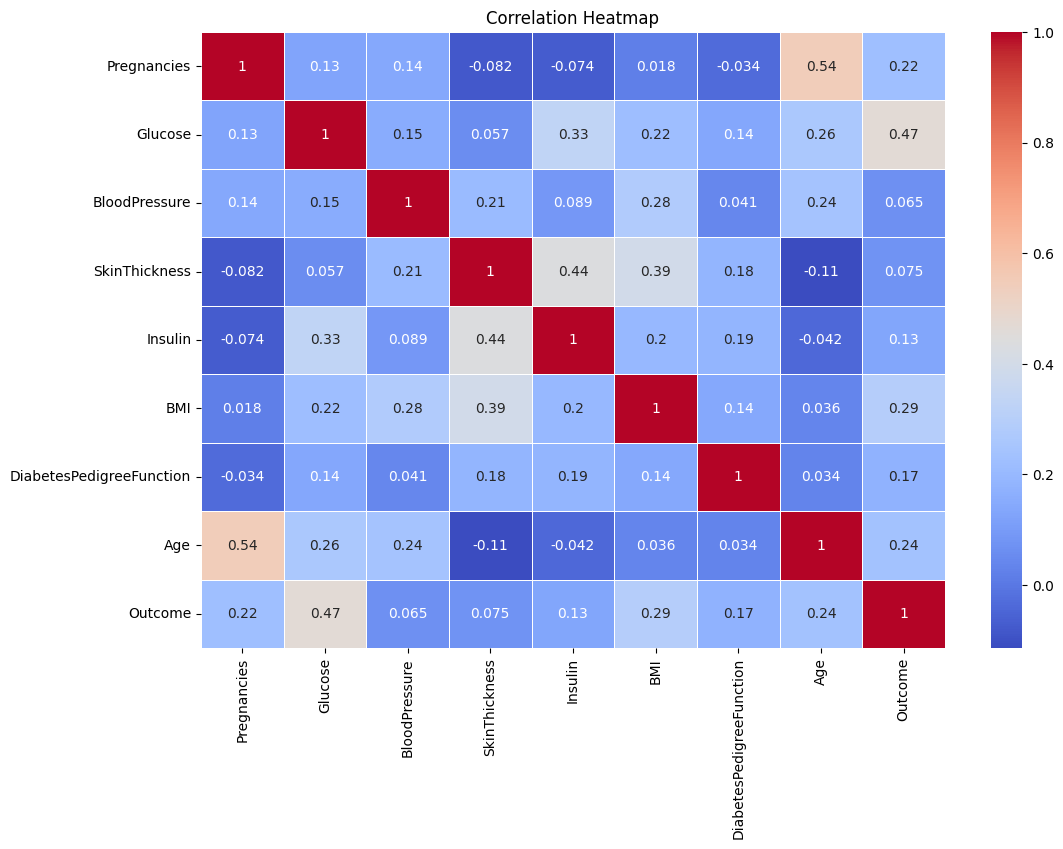

In [37]:
plt.figure(figsize=(12, 8))
corr_matrix = diabetes_dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


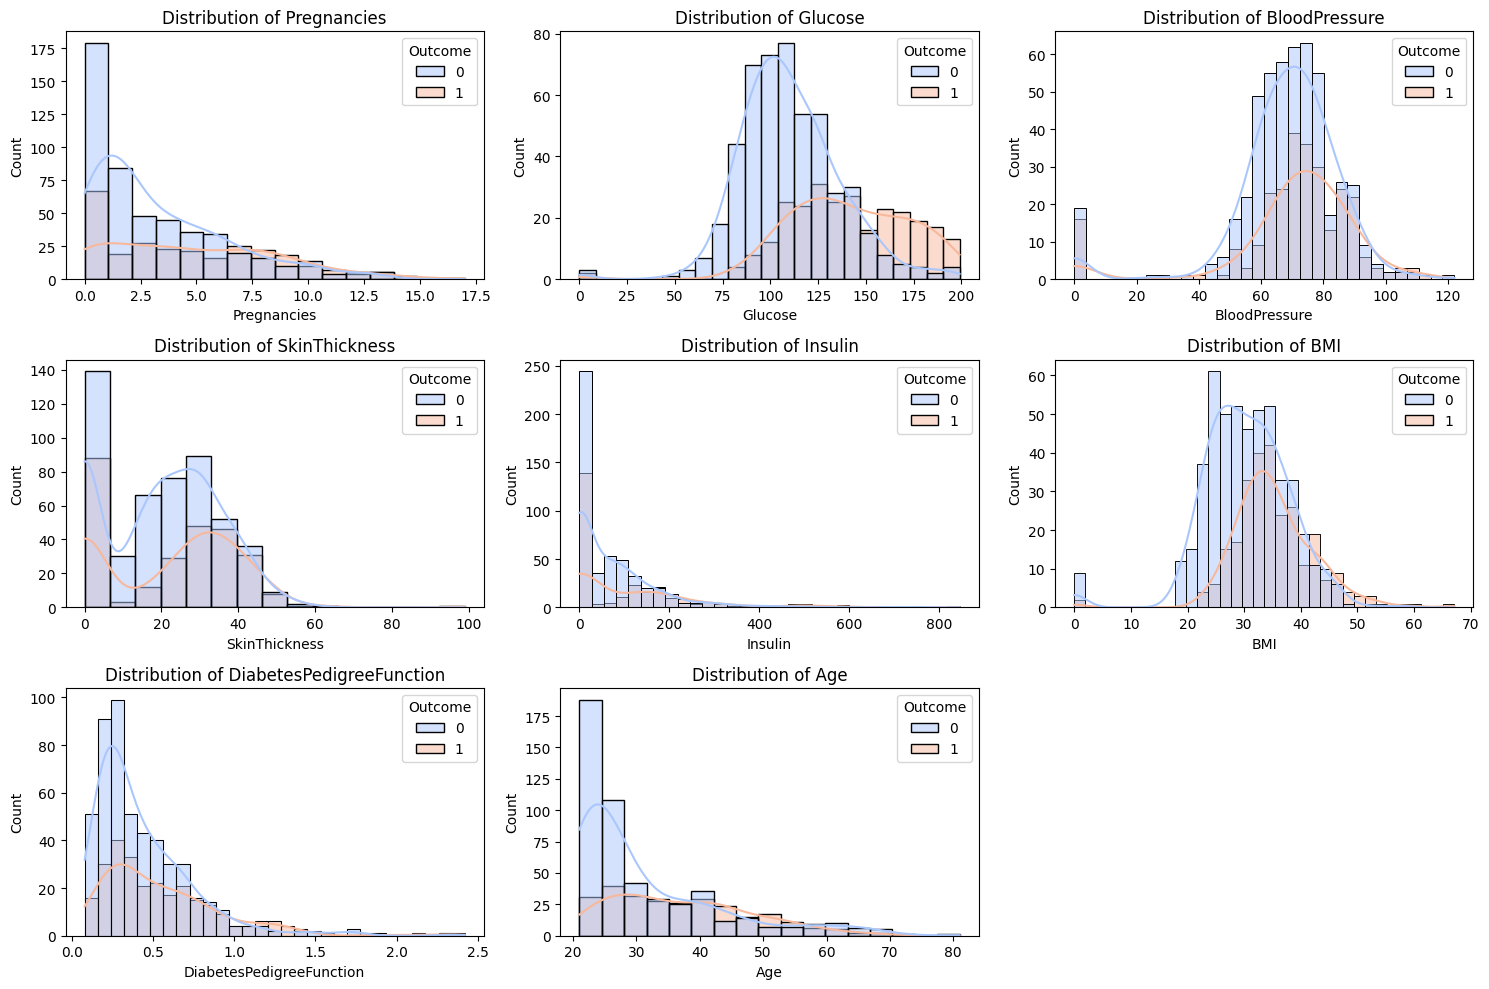

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=diabetes_dataset, x=column, hue='Outcome', kde=True, palette="coolwarm")
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


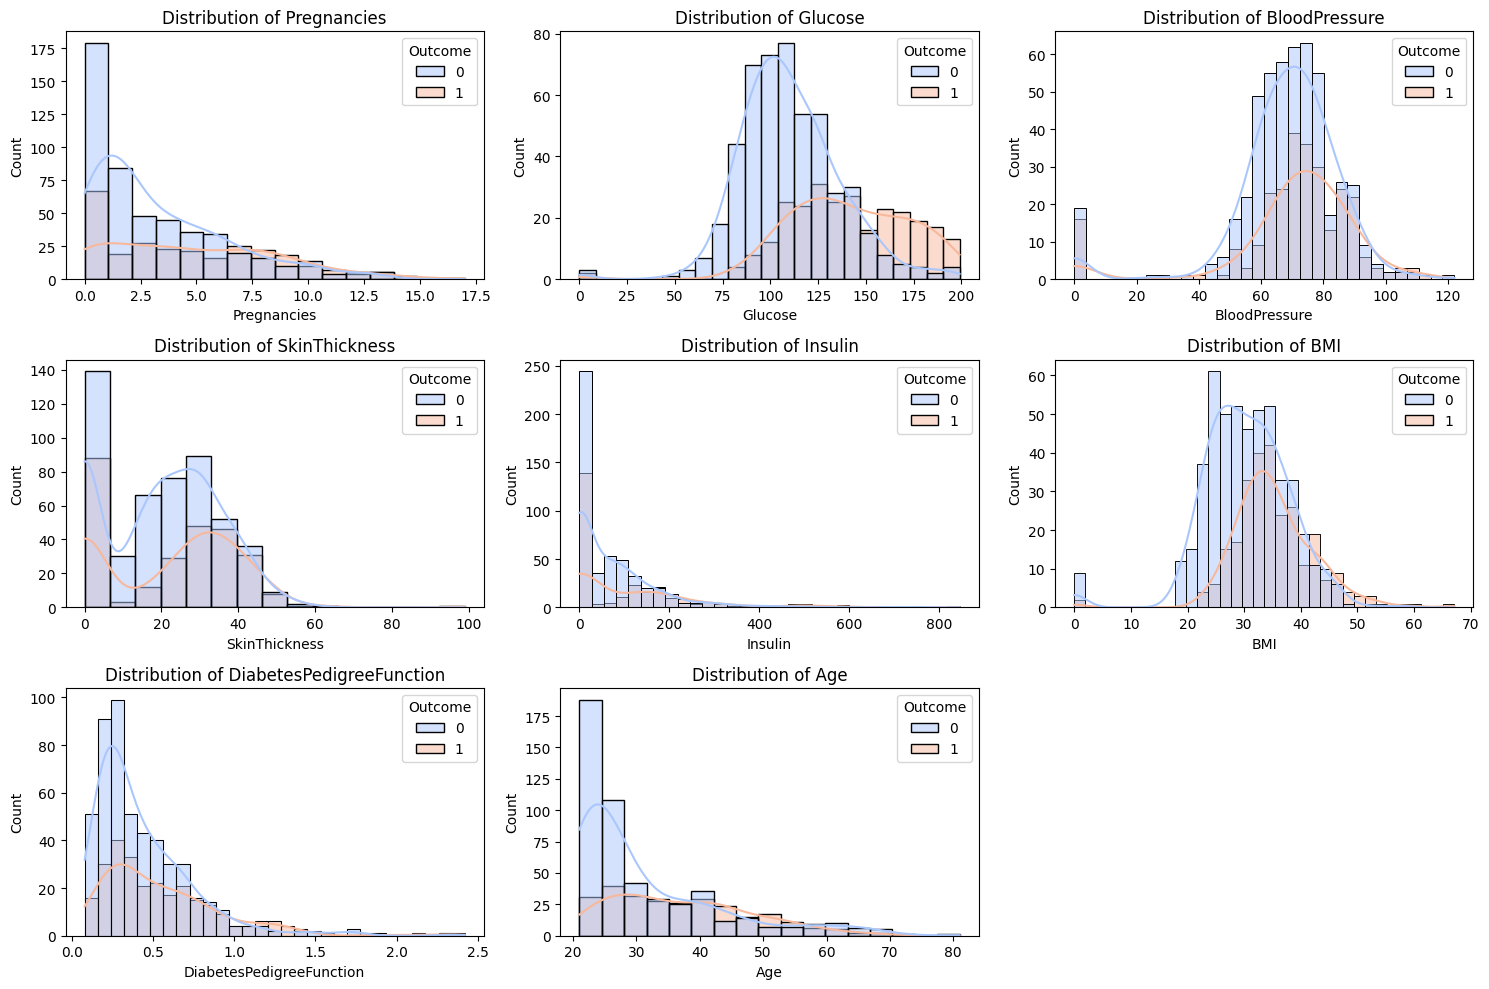

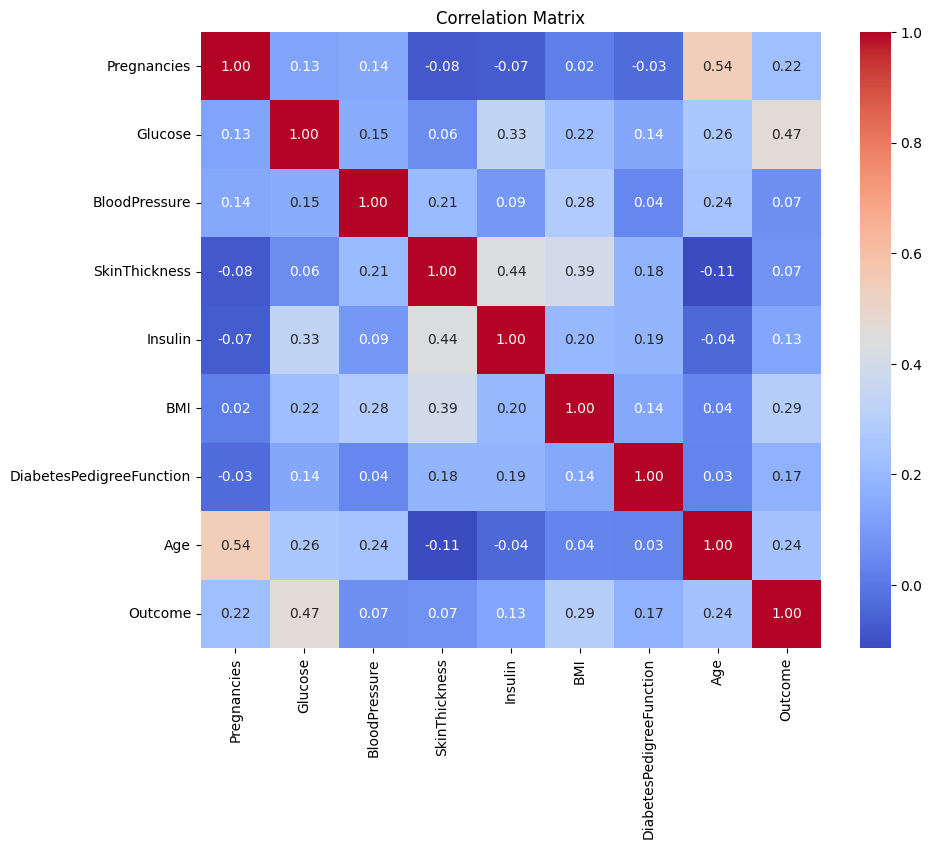

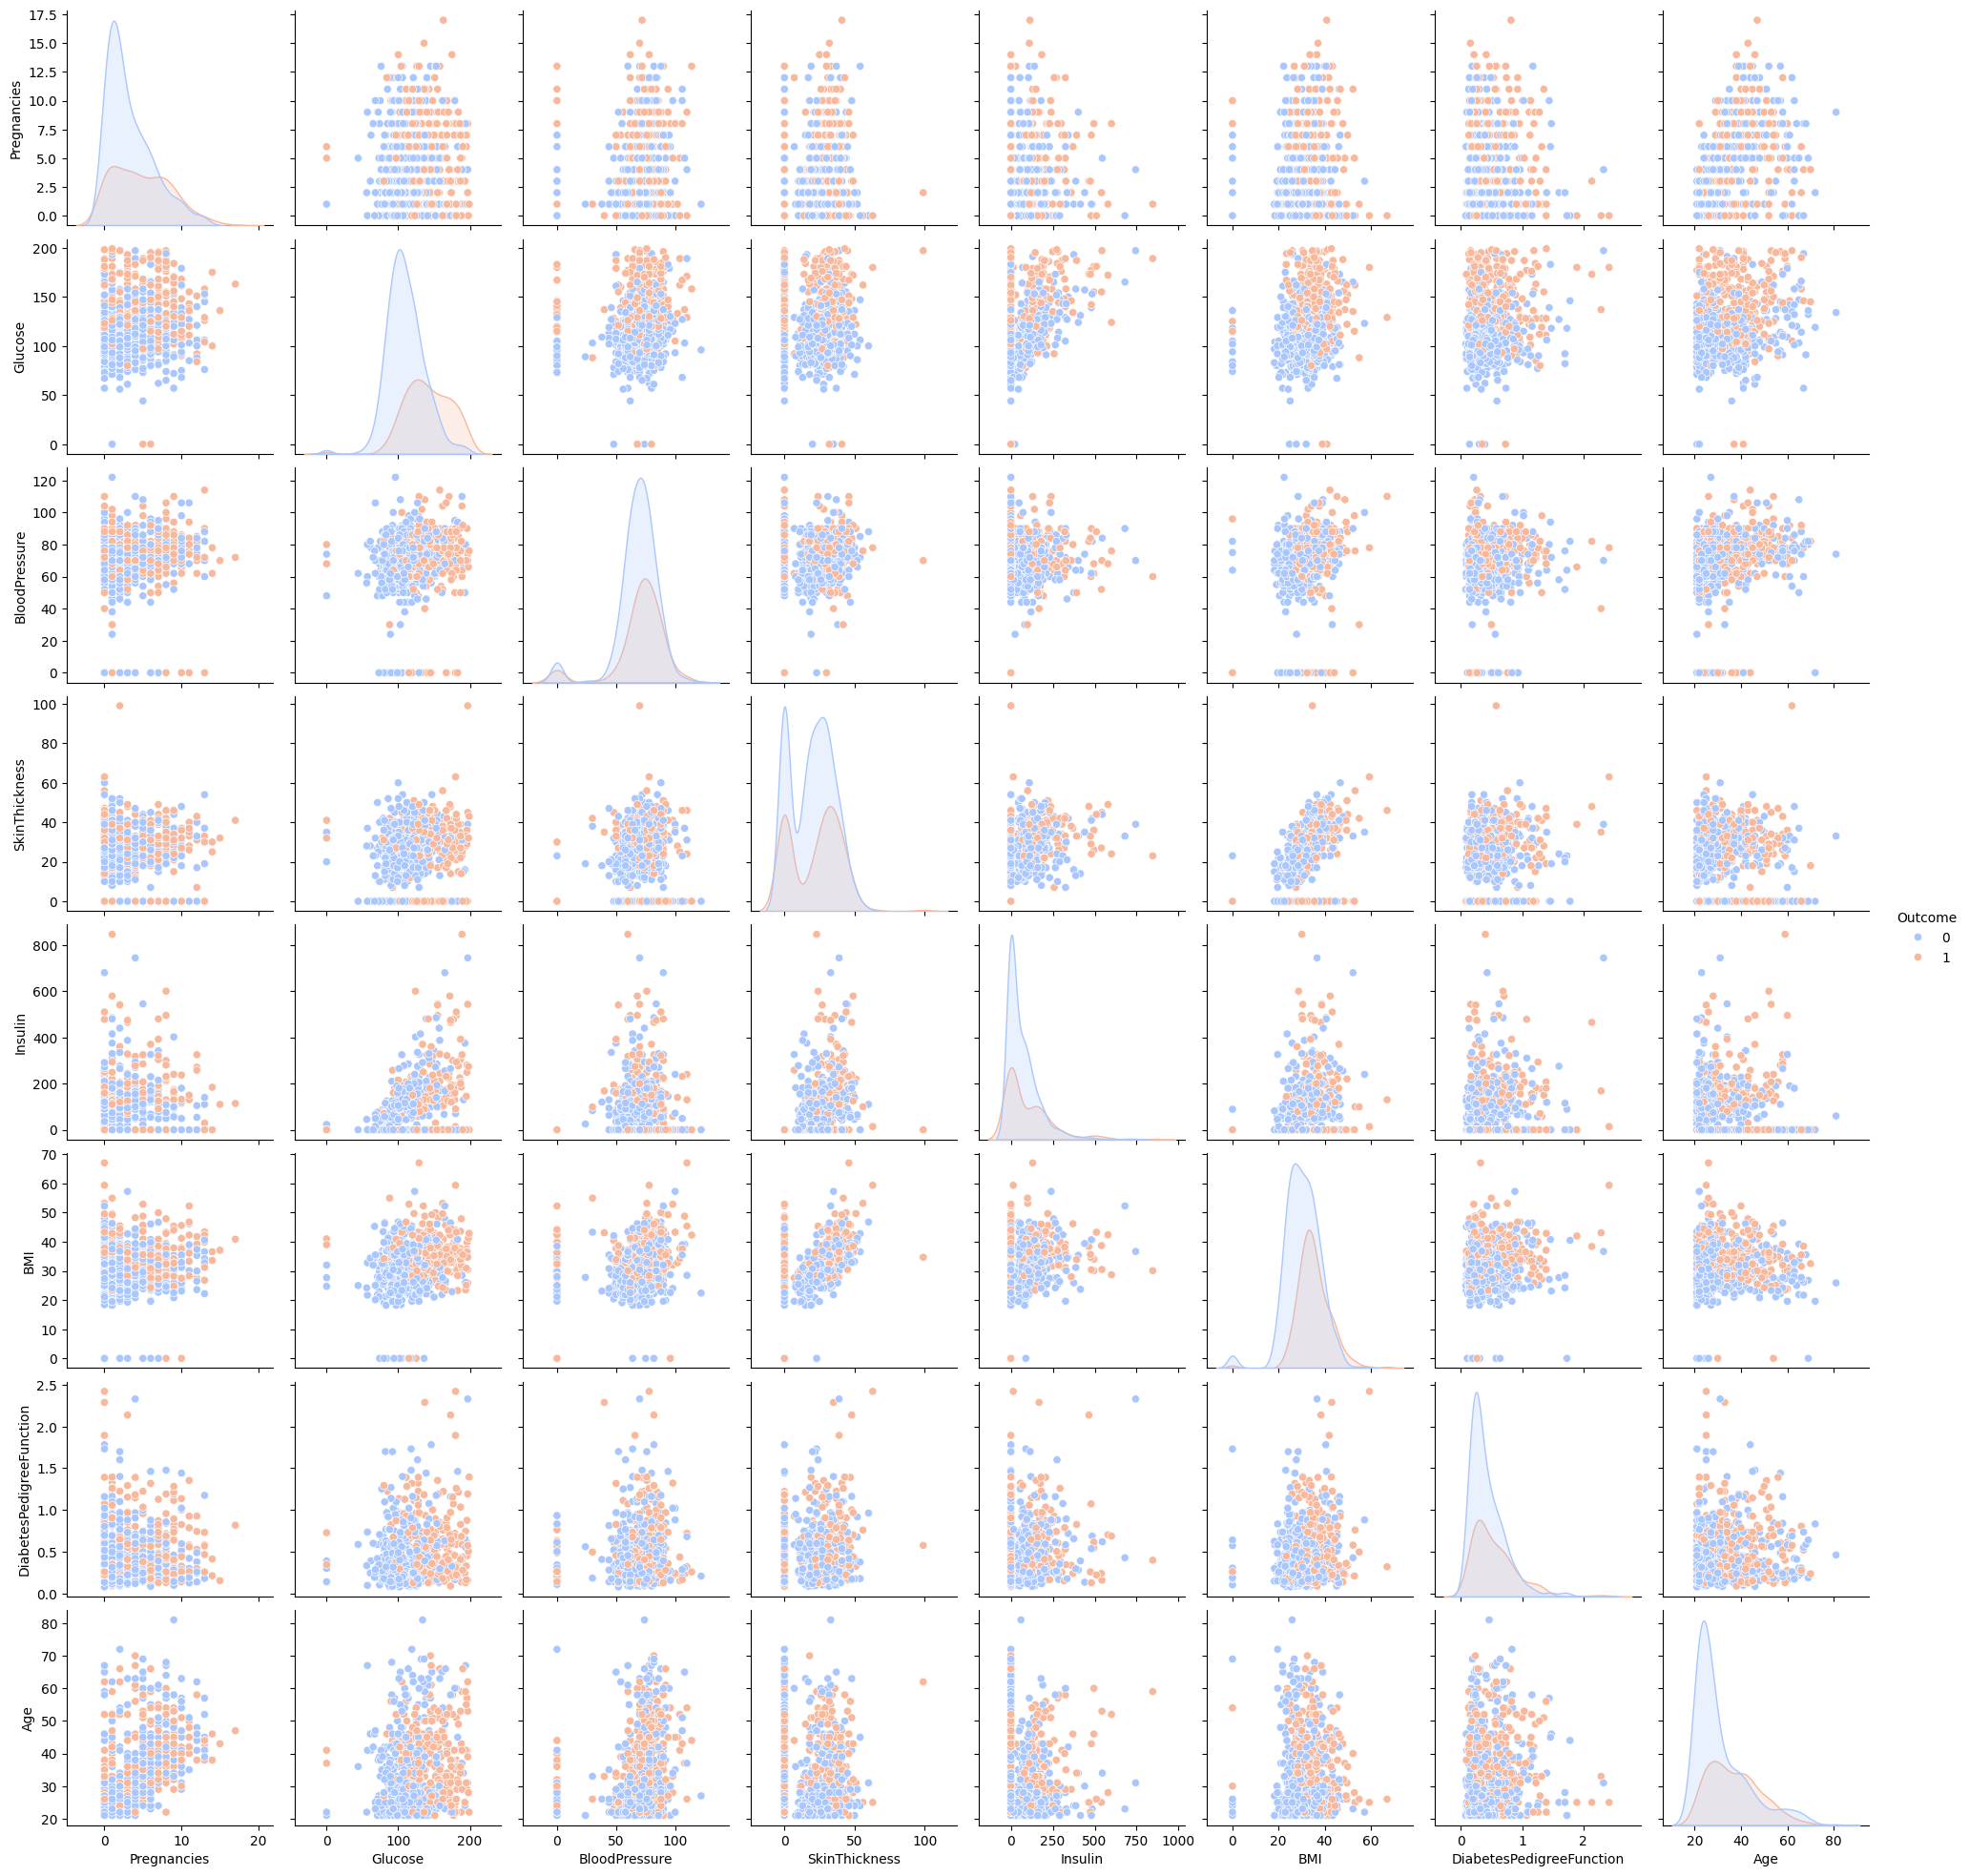

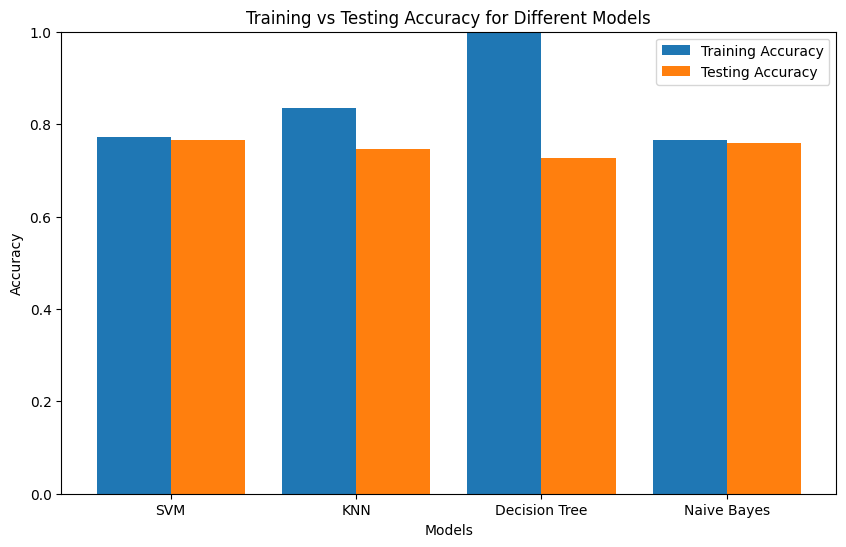

In [35]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Distribution Visualization
# Plot the distribution of each feature for both classes (0: Non-Diabetic, 1: Diabetic)
plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_dataset.columns[:-1], 1):  # Use diabetes_dataset.columns
    plt.subplot(3, 3, i)
    sns.histplot(data=diabetes_dataset, x=column, hue='Outcome', kde=True, palette="coolwarm")
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot to see pairwise relationships between features
sns.pairplot(diabetes_dataset, hue="Outcome", palette="coolwarm")
plt.show()

# Model Performance Visualization
# Visualizing Training and Testing Accuracy for each model
models = ['SVM', 'KNN', 'Decision Tree', 'Naive Bayes']
train_accuracies = []
test_accuracies = []

# Calculate and store accuracies
train_accuracies.append(accuracy_score(classifier1.predict(x_train), y_train))
test_accuracies.append(accuracy_score(classifier1.predict(x_test), y_test))

train_accuracies.append(accuracy_score(classifier2.predict(x_train), y_train))
test_accuracies.append(accuracy_score(classifier2.predict(x_test), y_test))

train_accuracies.append(accuracy_score(classifier3.predict(x_train), y_train))
test_accuracies.append(accuracy_score(classifier3.predict(x_test), y_test))

train_accuracies.append(accuracy_score(classifier4.predict(x_train), y_train))
test_accuracies.append(accuracy_score(classifier4.predict(x_test), y_test))

# Plotting accuracies
plt.figure(figsize=(10, 6))
x_axis = range(len(models))
plt.bar(x_axis, train_accuracies, width=0.4, label='Training Accuracy', align='center')
plt.bar([p + 0.4 for p in x_axis], test_accuracies, width=0.4, label='Testing Accuracy', align='center')
plt.xticks([p + 0.2 for p in x_axis], models)
plt.ylim([0, 1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Models')
plt.legend()
plt.show()
